<a href="https://colab.research.google.com/github/alsantosad/PROJECT-ROCKET/blob/backstage/M4TRABALHO_EM_GRUPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJETO EM GRUPO - MÓDULO 4**

## ***CONTEXTO***
Você e a sua equipe foram escalados pela Agência Nacional de Petróleo e Gás
Natural e Biocombustíveis (ANP) para realizar uma análise exploratória
relacionada à série histórica de preço de venda da gasolina e do etanol.

A ANP é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural no Brasil, que mantém o Banco de Dados de Exploração e
Produção (BDEP); divulga as estatísticas oficiais sobre reservas, refino e produção
de petróleo, gás e biocombustíveis no Brasil;
realiza e divulga pesquisas sobre
qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços
desses produtos; promove estudos sobre o potencial petrolífero e o
desenvolvimento do setor; entre outras atividades

Realizar a análise exploratória a partir das fontes de dados
disponíveis no portal gov.br.

Serão utilizados os arquivos
dos dois últimos meses do ano atual (Etanol Hidratado +
Gasolina C) contendo a série histórica dos preços da
gasolina e do etanol em todo o Brasil.


A análise deve responder às seguintes perguntas:
1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do
etanol e da gasolina tiveram uma tendência de queda ou aumento?
2. Qual o preço médio da gasolina e do etanol nesses dois meses?
3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
4. Qual o preço médio da gasolina e do etanol por estado?
5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?
7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?
9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?
Além disso, vocês deverão pensar em mais três perguntas que deverão ser respondidas por scripts.

Questões extras:

11. Qual a distribuição de bandeiras por região do país?
12. Existe alguma relação entre a data do mês em que determinadas bandeiras são mais lucrativas?
13. Existe alguma bandeira exclusiva de alguns estados?

## ***Importando Bibliotecas***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import unidecode as uni

## ***Analise Exploratória***

### *Leitura dos Datasets*

In [ ]:
#Lendo os csv pelo link do site

# Primeiro arquivo referente ao mês 11
url1 = 'https://raw.githubusercontent.com/alsantosad/PROJECT-ROCKET/master/DADOS/precos-gasolina-etanol-11.csv'
df1 = pd.read_csv(url1,sep=';')

# Segundo arquivo referente ao mês 12
url2 = 'https://raw.githubusercontent.com/alsantosad/PROJECT-ROCKET/master/DADOS/precos-gasolina-etanol-12.csv'
df2 = pd.read_csv(url2,sep=';')

# Leitura do dataset extra de latitude e longitude de cidades para geolocalização
municipios ='https://raw.githubusercontent.com/kelvins/municipios-brasileiros/main/csv/municipios.csv'
municipios_df = pd.read_csv(municipios,sep=',')

### *Visualizando os Datasets Separados*

In [ ]:
#Visualizando os dados do data set
df1.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA ADITIVADA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA


In [ ]:
#Visualizando os dados do data set
df2.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,MA,SANTA INES,POSTO MAGNOLIA LTDA,35.123.447/0001-32,AVENIDA MARECHAL CASTELO BRANCO,3707,NaN,CENTRO,65300-001,GASOLINA,01/12/2023,"5,59",NaN,R$ / litro,BRANCA
1,NE,MA,SANTA INES,POSTO MAGNOLIA LTDA,35.123.447/0001-32,AVENIDA MARECHAL CASTELO BRANCO,3707,NaN,CENTRO,65300-001,GASOLINA ADITIVADA,01/12/2023,"5,74",NaN,R$ / litro,BRANCA


In [ ]:
#Visualizando numero de linhas e colunas dos 2 Datasets
print(df1.shape,df2.shape)

(52543, 16) (49453, 16)


###*Juntando os Datasets com o método `concat()`*

In [ ]:
#Datasets juntos `df1, df2` e ignorando o index para melhor organização do Dataset
#Ignore index ajuda não dar erro
df = pd.concat([df1, df2],ignore_index=True)
df.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA ADITIVADA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA


## ***Limpeza dos Dados que vamos Trabalhar***

###*Visualizando as valores da coluna de varias formas*

In [ ]:
#Visualizando as informações da coluna "Valor de Compra"
df['Valor de Compra'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 101996 entries, 0 to 101995
Series name: Valor de Compra
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 797.0 KB


In [ ]:
# Visualizando a descrição
df['Valor de Compra'].describe

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
101991   NaN
101992   NaN
101993   NaN
101994   NaN
101995   NaN
Name: Valor de Compra, Length: 101996, dtype: float64>

In [ ]:
# Visualizando os tipos de valores
df['Valor de Compra'].value_counts

<bound method IndexOpsMixin.value_counts of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
101991   NaN
101992   NaN
101993   NaN
101994   NaN
101995   NaN
Name: Valor de Compra, Length: 101996, dtype: float64>

In [ ]:
#Visualizando os Tipos unicos de Valores na coluna
#Interessante, a função (.unique()) retorna um array
#A função (.unique) sem parentese retorna uma serie
#Diferentes metodos de visualização
df['Valor de Compra'].unique()

array([nan])

###*Corrigindo valores das colunas*

In [ ]:
# Corrigindo valores em "Valor de Venda". Substituindo as (,)virgulas por (.)ponto.
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.').astype(float)

In [ ]:
# Formatando a coluna Data da Coleta de str para DATE utilizando a função TO_DATETIME
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y')
df

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA,2023-11-01,6.30,NaN,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA ADITIVADA,2023-11-01,6.30,NaN,R$ / litro,VIBRA
2,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,ETANOL,2023-11-01,4.88,NaN,R$ / litro,VIBRA
3,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,GASOLINA,2023-11-01,6.19,NaN,R$ / litro,VIBRA
4,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,GASOLINA ADITIVADA,2023-11-01,6.29,NaN,R$ / litro,VIBRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101991,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,42.182.809/0001-21,RUA XAVIER DA SILVA,1596,NaN,CENTRO,83601-010,GASOLINA,2023-12-29,5.79,NaN,R$ / litro,IPIRANGA
101992,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,42.182.809/0001-21,RUA XAVIER DA SILVA,1596,NaN,CENTRO,83601-010,ETANOL,2023-12-29,3.79,NaN,R$ / litro,IPIRANGA
101993,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,28.259.725/0002-07,AVENIDA JORGE DARIVA,1536,NaN,CENTRO,95520-000,GASOLINA,2023-12-29,5.49,NaN,R$ / litro,RODOIL
101994,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,28.259.725/0002-07,AVENIDA JORGE DARIVA,1536,NaN,CENTRO,95520-000,GASOLINA ADITIVADA,2023-12-29,5.59,NaN,R$ / litro,RODOIL


###*Limpeza dos Dados, Removendo colunas indesejadas*

In [ ]:
#Removendo colunas que não serão uteis.
dfproc = df.drop(columns=['Valor de Compra','Nome da Rua','Numero Rua','Complemento','Cep','CNPJ da Revenda','Revenda'])
dfproc.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,GASOLINA,2023-11-01,6.3,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,GASOLINA ADITIVADA,2023-11-01,6.3,R$ / litro,VIBRA


In [ ]:
#Visualizando as informações da coluna, pois vamos trabalhar com ela.
dfproc['Valor de Venda'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 101996 entries, 0 to 101995
Series name: Valor de Venda
Non-Null Count   Dtype  
--------------   -----  
101996 non-null  float64
dtypes: float64(1)
memory usage: 797.0 KB


In [ ]:
#Removendo colunas que não serão uteis também no dataset adicional
municipios_df = municipios_df.drop(columns=['codigo_uf','codigo_ibge','capital', 'siafi_id', 'ddd', 'fuso_horario'])
municipios_df.head(2)

##***Organizando***

###*Separando em Regiões*

In [ ]:
#Ordenando as regiões
regioes = dfproc.sort_values('Regiao - Sigla')
regioes = pd.DataFrame(regioes)

#Verificando a reordenação
regioes.head(5)

### *Utilizando método `.merge` com Dataset extra para geolocalização*

Primeiro precisamos verificar se os Dtype são iguais para que seja possível fazer o merge.

Se não for, fazemos a alteração usando o método `.astype()`

In [ ]:
#Verificando as informações dos DataSets
dfproc.info()
municipios_df.info()


### *Normalizando os dados antes da mesclagem*

In [ ]:
#Criando uma função para tirar os acentos
def tira_acentos(nome):
    txt = uni.unidecode(str(nome))
    return txt

In [ ]:
#Colocando tudo em Caps Lock
municipios_df['nome'] = municipios_df['nome'].str.upper()

# Nova DF sem acentos = df antiga com acentos + método .apply()
municipios_df['nomes_cidades'] = municipios_df['nome'].apply(tira_acentos)

#Removendo coluna desnecessária

municipios_df = municipios_df.drop(columns=['nome'])
municipios_df.head(2)


###*Mesclando*

In [ ]:
#Selecionamos os dataframes que queremos mesclar, definimos o método e quais são a cardinalidade
df_geoloc = pd.merge(regioes, municipios_df, how= 'left', left_on='Municipio', right_on='nomes_cidades')
df_geoloc.head(2)

In [ ]:
#Removemos novamente a coluna desnecessária
df_geoloc = df_geoloc.drop(columns=['nomes_cidades'])
df_geoloc.head(2)

##***Perguntas***

###*1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?*

In [ ]:
#Verificando se o média do Valor do Etanol está de acordo com o gráfico mostrado
dfproc[dfproc['Produto'] == 'ETANOL']['Valor de Venda'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 2         4.88
5         4.85
10        4.89
13        4.19
16        4.17
          ... 
101984    3.19
101987    4.19
101990    4.27
101992    3.79
101995    3.99
Name: Valor de Venda, Length: 32912, dtype: float64>

In [ ]:
#Achando o Minimo e o Maximo do Valor de Venda do ETANOL
maior_valor_etanol = dfproc[dfproc['Produto'] == 'ETANOL']['Valor de Venda'].max()
menor_valor_etanol = dfproc[dfproc['Produto'] == 'ETANOL']['Valor de Venda'].min()
display(f'O maior valor do Etanol é {maior_valor_etanol}')
display(f'O menor valor do Etanol é {menor_valor_etanol}')

'O maior valor do Etanol é 6.6'

'O menor valor do Etanol é 2.69'

In [ ]:
#Buscando o maior valor de Venda do Etanol (Verificando Outlier)
maior_valor_etanol = dfproc[(dfproc['Produto'] == 'ETANOL') & (dfproc['Valor de Venda'] == 6.6)]
maior_valor_etanol.head(4)

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
8621,N,PA,SANTAREM,PRAINHA,ETANOL,2023-11-07,6.6,R$ / litro,SABBÁ
8624,N,PA,SANTAREM,FATIMA,ETANOL,2023-11-07,6.6,R$ / litro,SABBÁ
8629,N,PA,SANTAREM,AEROPORTO VELHO,ETANOL,2023-11-07,6.6,R$ / litro,SABBÁ
17645,N,PA,SANTAREM,PRAINHA,ETANOL,2023-11-13,6.6,R$ / litro,SABBÁ


In [ ]:
# Supondo que 'dados' é o DataFrame que contém seus dados
media_etanol = dfproc[dfproc['Produto'] == 'ETANOL']['Valor de Venda'].mean()

print(f'Média do valor de venda do Etanol: {media_etanol}')


Média do valor de venda do Etanol: 3.8141756806028195


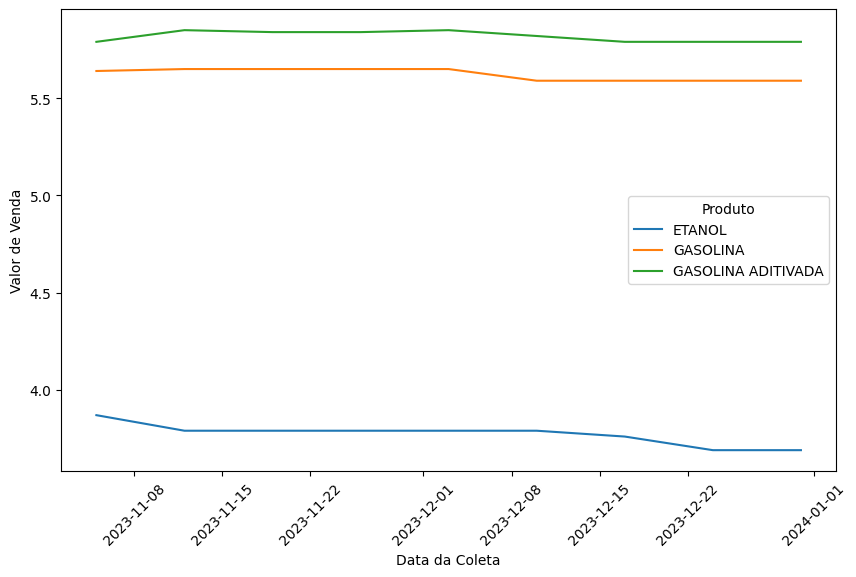

In [ ]:
# Agrupando por semana e tipo de combustível, e calculando a média dos preços de venda
comport = dfproc.groupby([pd.Grouper(key='Data da Coleta', freq='W'), 'Produto'])['Valor de Venda'].median().reset_index()
#Plotando o gráfico de linha
fig, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45)
sns.lineplot(data=comport, x='Data da Coleta', y='Valor de Venda', hue='Produto', ax=ax)
plt.show()

In [ ]:
comport = dfproc.groupby([pd.Grouper(key='Data da Coleta', freq='W'), 'Produto'])['Valor de Venda'].median()
comport

Data da Coleta  Produto           
2023-11-05      ETANOL                3.87
                GASOLINA              5.64
                GASOLINA ADITIVADA    5.79
2023-11-12      ETANOL                3.79
                GASOLINA              5.65
                GASOLINA ADITIVADA    5.85
2023-11-19      ETANOL                3.79
                GASOLINA              5.65
                GASOLINA ADITIVADA    5.84
2023-11-26      ETANOL                3.79
                GASOLINA              5.65
                GASOLINA ADITIVADA    5.84
2023-12-03      ETANOL                3.79
                GASOLINA              5.65
                GASOLINA ADITIVADA    5.85
2023-12-10      ETANOL                3.79
                GASOLINA              5.59
                GASOLINA ADITIVADA    5.82
2023-12-17      ETANOL                3.76
                GASOLINA              5.59
                GASOLINA ADITIVADA    5.79
2023-12-24      ETANOL                3.69
                GAS

In [ ]:
dfproc.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,GASOLINA,2023-11-01,6.3,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,GASOLINA ADITIVADA,2023-11-01,6.3,R$ / litro,VIBRA


###*2. Qual o preço médio da gasolina e do etanol nesses dois meses?*

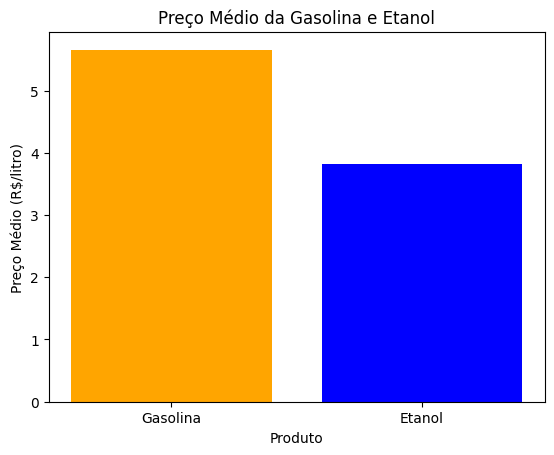

In [ ]:
# Filtrar apenas as linhas relacionadas à gasolina
gasolina_df = dfproc[dfproc['Produto'] == 'GASOLINA']

# Filtrar apenas as linhas relacionadas ao etanol
etanol_df = dfproc[dfproc['Produto'] == 'ETANOL']

# Calcular o preço médio da gasolina
preco_medio_gasolina = gasolina_df['Valor de Venda'].mean()

# Calcular o preço médio do etanol
preco_medio_etanol = etanol_df['Valor de Venda'].mean()

# Dados para o gráfico
produtos = ['Gasolina', 'Etanol']
precos_medios = [preco_medio_gasolina, preco_medio_etanol]

# Criar o gráfico de barras
plt.bar(produtos, precos_medios, color=['orange', 'blue'])

# Adicionar rótulos e título ao gráfico
plt.xlabel('Produto')
plt.ylabel('Preço Médio (R$/litro)')
plt.title('Preço Médio da Gasolina e Etanol')

# Mostrar o gráfico
plt.show()

###*3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?*

In [ ]:
dfproc.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,GASOLINA,2023-11-01,6.30,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,GASOLINA ADITIVADA,2023-11-01,6.30,R$ / litro,VIBRA
2,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,ETANOL,2023-11-01,4.88,R$ / litro,VIBRA


In [ ]:
# Filtra apenas as linhas relacionadas à gasolina
gasolina_df = dfproc[dfproc['Produto'] == 'GASOLINA']

# Filtra apenas as linhas relacionadas ao etanol
etanol_df = dfproc[dfproc['Produto'] == 'ETANOL']

# Calcula o preço médio da gasolina para cada estado
media_gasolina_por_estado = gasolina_df.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Calcula o preço médio do etanol para cada estado
media_etanol_por_estado = etanol_df.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Obtém os 5 estados com os preços médios mais altos para a gasolina
top5_gasolina = media_gasolina_por_estado.nlargest(5)

# Obtém os 5 estados com os preços médios mais altos para o etanol
top5_etanol = media_etanol_por_estado.nlargest(5)

# Exibe os resultados
print('Top 5 Estados com Preço Médio mais Alto para Gasolina:')
print(top5_gasolina)

print('\nTop 5 Estados com Preço Médio mais Alto para Etanol:')
print(top5_etanol)


Top 5 Estados com Preço Médio mais Alto para Gasolina:
Estado - Sigla
AC    6.894907
AM    6.601109
RO    6.439335
PA    6.001357
RR    5.892336
Name: Valor de Venda, dtype: float64

Top 5 Estados com Preço Médio mais Alto para Etanol:
Estado - Sigla
AP    5.397500
RO    5.088654
RR    4.872857
AC    4.808250
PA    4.606010
Name: Valor de Venda, dtype: float64


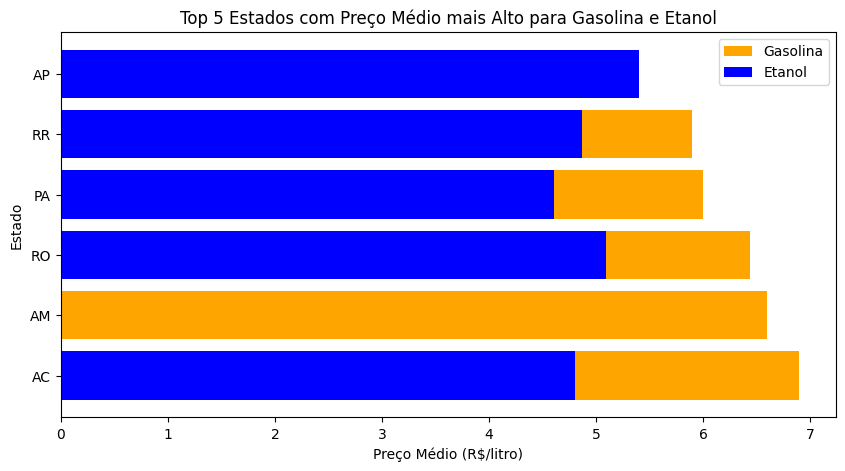

In [ ]:
# Configuração do gráfico de barras para a gasolina
plt.figure(figsize=(10, 5))
plt.barh(top5_gasolina.index, top5_gasolina, color='orange', label='Gasolina')

# Configuração do gráfico de barras para o etanol
plt.barh(top5_etanol.index, top5_etanol, color='blue', label='Etanol')

# Adiciona rótulos e título ao gráfico
plt.xlabel('Preço Médio (R$/litro)')
plt.ylabel('Estado')
plt.title('Top 5 Estados com Preço Médio mais Alto para Gasolina e Etanol')
plt.legend()

# Mostra o gráfico
plt.show()


###*4. Qual o preço médio da gasolina e do etanol por estado?*

In [ ]:
# Filtra apenas as linhas relacionadas à gasolina
gasolina_df = dfproc[dfproc['Produto'] == 'GASOLINA']

# Filtra apenas as linhas relacionadas ao etanol
etanol_df = dfproc[dfproc['Produto'] == 'ETANOL']

# Calcula o preço médio da gasolina para cada estado
media_gasolina_por_estado = gasolina_df.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Calcula o preço médio do etanol para cada estado
media_etanol_por_estado = etanol_df.groupby('Estado - Sigla')['Valor de Venda'].mean()

print(f'A média do Preço da Gasolina por Estado é {media_gasolina_por_estado}')
print(f'A média do Preço do Etanol por Estado é {media_etanol_por_estado}')

A média do Preço da Gasolina por Estado é Estado - Sigla
AC    6.894907
AL    5.868059
AM    6.601109
AP    5.568994
BA    5.888282
CE    5.795289
DF    5.532317
ES    5.764608
GO    5.532579
MA    5.512465
MG    5.539809
MS    5.709834
MT    5.649198
PA    6.001357
PB    5.584381
PE    5.472004
PI    5.386226
PR    5.746458
RJ    5.695776
RN    5.696989
RO    6.439335
RR    5.892336
RS    5.605301
SC    5.734883
SE    5.655691
SP    5.522834
TO    5.841281
Name: Valor de Venda, dtype: float64
A média do Preço do Etanol por Estado é Estado - Sigla
AC    4.808250
AL    4.306241
AM    4.551735
AP    5.397500
BA    4.238109
CE    4.528349
DF    3.600460
ES    4.138996
GO    3.503608
MA    4.424092
MG    3.553628
MS    3.648490
MT    3.170450
PA    4.606010
PB    3.980656
PE    3.997808
PI    4.077849
PR    3.761886
RJ    4.102228
RN    4.441496
RO    5.088654
RR    4.872857
RS    4.596458
SC    4.343896
SE    4.381404
SP    3.412366
TO    4.247546
Name: Valor de Venda, dtype: float64


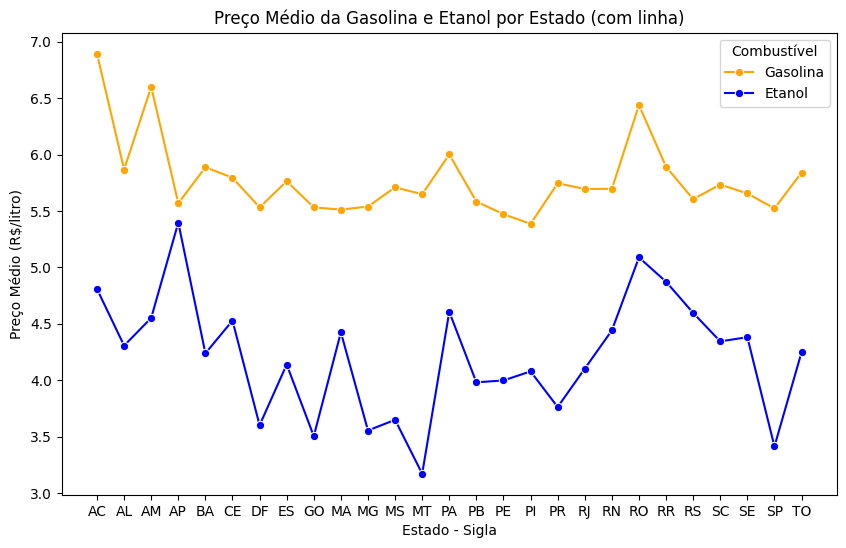

In [ ]:
# Juntando os dataframes para facilitar a visualização
df = pd.DataFrame({'Gasolina': media_gasolina_por_estado, 'Etanol': media_etanol_por_estado}).reset_index()

# Criando o gráfico de linhas usando seaborn com cores personalizadas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.melt('Estado - Sigla', var_name='Combustível', value_name='Preço Médio (R$/litro)'),
             x='Estado - Sigla', y='Preço Médio (R$/litro)', hue='Combustível', marker='o', palette={'Gasolina': 'orange', 'Etanol': 'blue'})
plt.title('Preço Médio da Gasolina e Etanol por Estado (com linha)')
plt.xlabel('Estado - Sigla')
plt.ylabel('Preço Médio (R$/litro)')

plt.show()

###*5. Qual o município que possui o menor preço para a gasolina e para o etanol?*

In [ ]:
# Calcula o preço minimo da gasolina para cada estado
min_gasolina_por_municipio = gasolina_df.groupby('Municipio')['Valor de Venda'].min()
municipio_menor_gasolina = min_gasolina_por_municipio.sort_values().head(1)
df_municipio_menor_gasolina = pd.DataFrame(municipio_menor_gasolina)
df_municipio_menor_gasolina

,Valor de Venda
Municipio,
SAO CARLOS,4.49


In [ ]:
# Calcula o preço minimo do etanol para cada municipio
min_etanol_por_municipio = etanol_df.groupby('Municipio')['Valor de Venda'].min()
municipio_menor_etanol = min_etanol_por_municipio.sort_values().head(1)
df_municipio_menor_etanol = pd.DataFrame(municipio_menor_etanol)
df_municipio_menor_etanol

,Valor de Venda
Municipio,
SAO PAULO,2.69


###*6. Qual o município que possui o maior preço para a gasolina e para o etanol?*


In [ ]:
# Calcula o preço maximo da gasolina para cada municipio
max_gasolina_por_municipio = gasolina_df.groupby('Municipio')['Valor de Venda'].max()
municipio_max_gasolina = max_gasolina_por_municipio.sort_values().head(1)
df_municipio_max_gasolina = pd.DataFrame(municipio_max_gasolina)
df_municipio_max_gasolina

,Valor de Venda
Municipio,
SAO JOSE DE RIBAMAR,5.09


In [ ]:
# Calcula o preço maximo do etanol para cada estado
max_etanol_por_municipio = etanol_df.groupby('Municipio')['Valor de Venda'].max()
municipio_max_etanol = max_etanol_por_municipio.sort_values().head(1)
df_municipio_max_etanol=pd.DataFrame(municipio_max_etanol)
df_municipio_max_etanol

,Valor de Venda
Municipio,
TRINDADE,3.09


###*7. Qual a região que possui o maior valor médio da gasolina?*

In [ ]:
media_gasolina_por_regiao = gasolina_df.groupby("Regiao - Sigla")['Valor de Venda'].mean()

regiao_maior_media_gasolina = media_gasolina_por_regiao.idxmax()
valor_maior_media_gasolina = media_gasolina_por_regiao.max()

print(f'A região com o maior valor médio de gasolina é {regiao_maior_media_gasolina} com média de {valor_maior_media_gasolina:.2f} R$/litro.')

regioes_ordenadas = media_gasolina_por_regiao.sort_values(ascending=False)

df_regiao_max_gasolina = pd.DataFrame(regioes_ordenadas)
df_regiao_max_gasolina

A região com o maior valor médio de gasolina é N com média de 6.17 R$/litro.


,Valor de Venda
Regiao - Sigla,
N,6.171947
S,5.687915
NE,5.686899
CO,5.580768
SE,5.564621


###*8.Qual a região que possui o menor valor médio do etanol?*

In [ ]:
media_etanol_por_regiao = etanol_df.groupby("Regiao - Sigla")['Valor de Venda'].mean()

regiao_maior_media_etanol = media_etanol_por_regiao.idxmax()
valor_maior_media_etanol = media_etanol_por_regiao.max()

print(f'A região com o maior valor médio de Etanol é {regiao_maior_media_etanol} com média de {valor_maior_media_etanol:.2f} R$/litro.')

regioes_ordenadas = media_etanol_por_regiao.sort_values(ascending=False)

df_regiao_media_etanol = pd.DataFrame(regioes_ordenadas)
df_regiao_media_etanol

A região com o maior valor médio de Etanol é N com média de 4.58 R$/litro.


,Valor de Venda
Regiao - Sigla,
N,4.584460
NE,4.249076
S,4.078209
SE,3.572342
CO,3.479649


###*9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?*

#### ***Correlação do Etanol e a Região***

In [ ]:
# Selecionando o etanol da região norte
norte_etanol = dfproc.loc[(dfproc['Regiao - Sigla'] == 'N') & (dfproc['Produto'] == 'ETANOL'), 'Valor de Venda'].astype(float)

# Selecionando o etanol da região nordeste
nordeste_etanol = dfproc.loc[(dfproc['Regiao - Sigla'] == 'NE') & (dfproc['Produto'] == 'ETANOL'), 'Valor de Venda'].astype(float)

# Selecionando o etanol da região Sul
sul_etanol = dfproc.loc[(dfproc['Regiao - Sigla'] == 'S') & (dfproc['Produto'] == 'ETANOL'), 'Valor de Venda'].astype(float)

# Selecionando o etanol da região Suldeste
suldeste_etanol = dfproc.loc[(dfproc['Regiao - Sigla'] == 'SE') & (dfproc['Produto'] == 'ETANOL'), 'Valor de Venda'].astype(float)

# Selecionando o etanol da região Centro Oeste
co_etanol = dfproc.loc[(dfproc['Regiao - Sigla'] == 'CO') & (dfproc['Produto'] == 'ETANOL'), 'Valor de Venda'].astype(float)

# Criando um Data frame com as informações filtradas
etanol_dados_regiao = pd.DataFrame({'Norte':norte_etanol,'Nordeste':nordeste_etanol,'Sul':sul_etanol,'Sudeste':suldeste_etanol,'Centro Oeste':co_etanol})

etanol_dados_regiao.fillna(0).corr()

,Norte,Nordeste,Sul,Sudeste,Centro Oeste
Norte,1.000000,-0.102039,-0.078474,-0.209946,-0.060127
Nordeste,-0.102039,1.000000,-0.200977,-0.537687,-0.153990
Sul,-0.078474,-0.200977,1.000000,-0.413512,-0.118427
Sudeste,-0.209946,-0.537687,-0.413512,1.000000,-0.316835
Centro Oeste,-0.060127,-0.153990,-0.118427,-0.316835,1.000000


In [ ]:
etanol_dados_regiao.isnull().shape[0]

32912

In [ ]:
etanol_dados_regiao.shape

(32912, 5)

In [ ]:
etanol_dados_regiao

,Norte,Nordeste,Sul,Sudeste,Centro Oeste
2,NaN,4.88,NaN,NaN,NaN
5,NaN,4.85,NaN,NaN,NaN
10,NaN,4.89,NaN,NaN,NaN
13,NaN,4.19,NaN,NaN,NaN
16,NaN,4.17,NaN,NaN,NaN
...,...,...,...,...,...
101984,NaN,NaN,NaN,NaN,3.19
101987,NaN,4.19,NaN,NaN,NaN
101990,NaN,4.27,NaN,NaN,NaN
101992,NaN,NaN,3.79,NaN,NaN


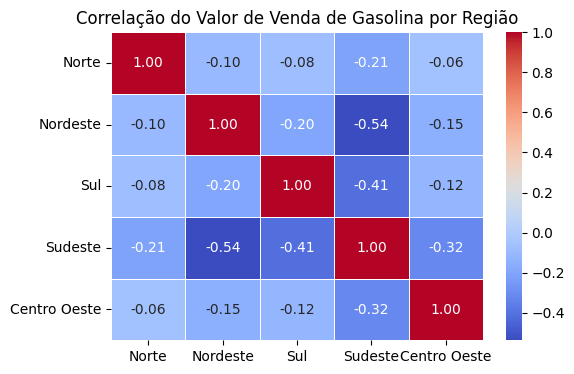

In [ ]:
# Preenchendo valores nulos com 0 e calculando a correlação
correlation_matrix_etanol = etanol_dados_regiao.fillna(0).corr()

# Criando o mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_etanol, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlação do Valor de Venda de Gasolina por Região')
plt.show()

#### ***Correlação do Gasolina e a Região***

In [ ]:
# Selecionando o Gasolina da região norte
norte_gasolina = dfproc.loc[(dfproc['Regiao - Sigla'] == 'N') & (dfproc['Produto'] == 'GASOLINA'), 'Valor de Venda'].astype(float)

# Selecionando o Gasolina da região nordeste
nordeste_gasolina = dfproc.loc[(dfproc['Regiao - Sigla'] == 'NE') & (dfproc['Produto'] == 'GASOLINA'), 'Valor de Venda'].astype(float)

# Selecionando o Gasolina da região Sul
sul_gasolina = dfproc.loc[(dfproc['Regiao - Sigla'] == 'S') & (dfproc['Produto'] == 'GASOLINA'), 'Valor de Venda'].astype(float)

# Selecionando o Gasolina da região Suldeste
suldeste_gasolina = dfproc.loc[(dfproc['Regiao - Sigla'] == 'SE') & (dfproc['Produto'] == 'GASOLINA'), 'Valor de Venda'].astype(float)

# Selecionando o Gasolina da região Centro Oeste
co_gasolina = dfproc.loc[(dfproc['Regiao - Sigla'] == 'CO') & (dfproc['Produto'] == 'GASOLINA'), 'Valor de Venda'].astype(float)

# Criando um Data frame com as informações filtradas
gasolina_dados_regiao = pd.DataFrame({'Norte':norte_gasolina,'Nordeste':nordeste_gasolina,'Sul':sul_gasolina,'Sudeste':suldeste_gasolina,'Centro Oeste':co_gasolina})

gasolina_dados_regiao.fillna(0).corr()

,Norte,Nordeste,Sul,Sudeste,Centro Oeste
Norte,1.000000,-0.140020,-0.129089,-0.260661,-0.080088
Nordeste,-0.140020,1.000000,-0.233782,-0.472060,-0.145040
Sul,-0.129089,-0.233782,1.000000,-0.435207,-0.133717
Sudeste,-0.260661,-0.472060,-0.435207,1.000000,-0.270005
Centro Oeste,-0.080088,-0.145040,-0.133717,-0.270005,1.000000


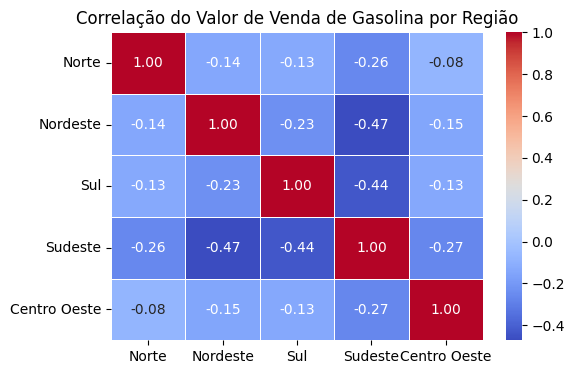

In [ ]:
# Preenchendo valores nulos com 0 e calculando a correlação
correlation_matrix_gasol = gasolina_dados_regiao.fillna(0).corr()

# Criando o mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_gasol, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlação do Valor de Venda de Gasolina por Região')
plt.show()

###*10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?*

#### *Visualizando e tratando DataFrame*

In [ ]:
# Filtrar apenas as linhas relacionadas a combustíveis
combustiveis_df = dfproc[dfproc['Produto'].isin(['GASOLINA', 'ETANOL'])]

# Agrupar por Bandeira e Produto, calculando a média do Valor de Venda
agrupado_combustiveis = combustiveis_df.groupby(['Bandeira','Regiao - Sigla','Data da Coleta','Produto'])['Valor de Venda'].mean()

In [ ]:
# Separando os dados dos Combustivel em colunas para facilitar o entendimento
combustivel_bandeira = agrupado_combustiveis.unstack()
combustivel_bandeira

Produto                                      ETANOL  GASOLINA
Bandeira    Regiao - Sigla Data da Coleta                    
ALESAT      CO             2023-11-01      3.320000  5.420000
                           2023-11-06      2.990000  4.990000
                           2023-11-07      3.240000  5.370000
                           2023-11-08      3.185714  5.317143
                           2023-11-14      3.433333  5.495000
...                                             ...       ...
WALENDOWSKY S              2023-11-20      4.590000  5.980000
                           2023-11-27      4.590000  5.980000
                           2023-12-04      4.590000  5.980000
                           2023-12-18      4.290000  5.980000
                           2023-12-27      4.290000  5.980000

[1739 rows x 2 columns]

In [ ]:
# Utilizamos essa função para dropar a coluna Gasolina, criar um novo dataframe e renomear o nome de
# index que estava como Produto, removendo o nome e deixando o index sem nome e reindexando.
etanol = combustivel_bandeira.drop('GASOLINA', axis=1).copy().rename_axis(None, axis=1).reset_index()
etanol

,Bandeira,Regiao - Sigla,Data da Coleta,ETANOL
0,ALESAT,CO,2023-11-01,3.320000
1,ALESAT,CO,2023-11-06,2.990000
2,ALESAT,CO,2023-11-07,3.240000
3,ALESAT,CO,2023-11-08,3.185714
4,ALESAT,CO,2023-11-14,3.433333
...,...,...,...,...
1734,WALENDOWSKY,S,2023-11-20,4.590000
1735,WALENDOWSKY,S,2023-11-27,4.590000
1736,WALENDOWSKY,S,2023-12-04,4.590000
1737,WALENDOWSKY,S,2023-12-18,4.290000


### ***Região Nordeste***

#### ***Etanol***

In [ ]:
# Selecionando a Região do Etanol
etanol_ne = etanol[etanol['Regiao - Sigla'] == 'NE']
etanol_ne

,Bandeira,Regiao - Sigla,Data da Coleta,ETANOL
38,ALESAT,NE,2023-11-01,4.531250
39,ALESAT,NE,2023-11-02,4.193333
40,ALESAT,NE,2023-11-03,4.963333
41,ALESAT,NE,2023-11-06,4.396000
42,ALESAT,NE,2023-11-07,4.200833
...,...,...,...,...
1642,VIBRA,NE,2023-12-25,4.010233
1643,VIBRA,NE,2023-12-26,4.048537
1644,VIBRA,NE,2023-12-27,4.123667
1645,VIBRA,NE,2023-12-28,4.211136


In [ ]:
# Criando um novo DataFrame com o Index:Data da Coleta, Colunas: Bandeira, Valores: Etanol para fazer uma correlação.
etanol_ne_novodf = etanol_ne.pivot(index='Data da Coleta', columns='Bandeira', values='ETANOL')
etanol_ne_novodf

Bandeira,ALESAT,BRANCA,DISLUB,FAN,FEDERAL ENERGIA,IPIRANGA,LARCO,PETROBAHIA,PETROX DISTRIBUIDORA,RAIZEN,SABBÁ,SETTA DISTRIBUIDORA,SP,TDC DISTRIBUIDORA,TEMAPE,VIBRA
Data da Coleta,,,,,,,,,,,,,,,,
2023-11-01,4.531250,4.420000,NaN,NaN,NaN,4.530000,NaN,4.440000,NaN,4.393333,NaN,3.830,4.720000,NaN,NaN,4.356190
2023-11-02,4.193333,4.186364,NaN,NaN,NaN,4.152222,NaN,NaN,NaN,4.101250,NaN,NaN,NaN,NaN,NaN,4.295556
2023-11-03,4.963333,4.150952,NaN,NaN,NaN,4.431875,3.940000,NaN,NaN,4.380000,4.090000,NaN,4.676667,NaN,NaN,4.333500
2023-11-06,4.396000,4.267126,4.290000,4.39,3.89,4.415714,NaN,NaN,4.690000,4.265000,4.425000,NaN,NaN,3.89,3.99,4.341042
2023-11-07,4.200833,4.261373,NaN,4.50,3.79,4.441034,3.815000,3.960000,4.623333,4.436923,4.117500,NaN,4.590000,NaN,NaN,4.287917
2023-11-08,4.533333,4.355934,4.335000,NaN,3.95,4.390476,3.780000,4.183333,4.690000,4.237500,4.372500,4.010,4.770000,3.79,NaN,4.274921
2023-11-09,4.428462,4.219375,NaN,NaN,NaN,4.441667,NaN,NaN,NaN,4.421429,4.090000,NaN,4.390000,NaN,NaN,4.345263
2023-11-10,4.390000,3.987143,NaN,NaN,NaN,4.090000,NaN,NaN,NaN,3.971250,NaN,NaN,4.990000,NaN,NaN,4.082000
2023-11-13,4.408333,4.295376,4.190000,3.99,3.79,4.474286,NaN,NaN,4.665000,4.297667,4.363333,3.800,4.190000,3.79,3.99,4.265593


In [ ]:
# Fazendo a correlação do preço do etanol de bandeira para outra bandeira.
# Filtrando os dados faltantes com o Fillna()
etanol_correlacao_ne = etanol_ne_novodf.fillna(0).corr()
etanol_correlacao_ne

Bandeira,ALESAT,BRANCA,DISLUB,FAN,FEDERAL ENERGIA,IPIRANGA,LARCO,PETROBAHIA,PETROX DISTRIBUIDORA,RAIZEN,SABBÁ,SETTA DISTRIBUIDORA,SP,TDC DISTRIBUIDORA,TEMAPE,VIBRA
Bandeira,,,,,,,,,,,,,,,,
ALESAT,1.000000,0.350721,0.156137,0.113094,0.117320,0.682527,0.137675,0.168545,0.145880,0.674437,-0.143065,0.144795,0.304052,0.137845,0.067502,0.677579
BRANCA,0.350721,1.000000,0.211077,0.113661,0.070852,0.295254,0.112231,0.323006,0.282450,0.304458,-0.015521,-0.025318,0.324111,0.271598,-0.040915,0.277344
DISLUB,0.156137,0.211077,1.000000,0.410986,0.325916,0.240822,0.279254,0.224129,0.431171,0.208491,0.209673,0.552980,0.119147,0.570768,0.443917,0.221833
FAN,0.113094,0.113661,0.410986,1.000000,0.289590,0.233083,-0.070419,0.213866,0.307990,0.202617,0.297639,0.194712,0.101301,0.307620,0.429345,0.196776
FEDERAL ENERGIA,0.117320,0.070852,0.325916,0.289590,1.000000,0.193026,0.156125,0.122290,0.158056,0.183003,0.290619,0.243537,0.154399,0.170789,0.113036,0.186157
IPIRANGA,0.682527,0.295254,0.240822,0.233083,0.193026,1.000000,0.162806,0.305515,0.250150,0.991123,0.104937,0.164937,0.410289,0.186509,0.127716,0.992476
LARCO,0.137675,0.112231,0.279254,-0.070419,0.156125,0.162806,1.000000,0.246640,0.099996,0.176418,-0.081007,0.184040,0.134154,0.183484,-0.123568,0.160477
PETROBAHIA,0.168545,0.323006,0.224129,0.213866,0.122290,0.305515,0.246640,1.000000,0.082831,0.336111,0.134830,0.134632,0.391774,-0.012951,-0.141566,0.282347
PETROX DISTRIBUIDORA,0.145880,0.282450,0.431171,0.307990,0.158056,0.250150,0.099996,0.082831,1.000000,0.205697,0.305018,0.259235,0.115184,0.407786,0.534119,0.192525


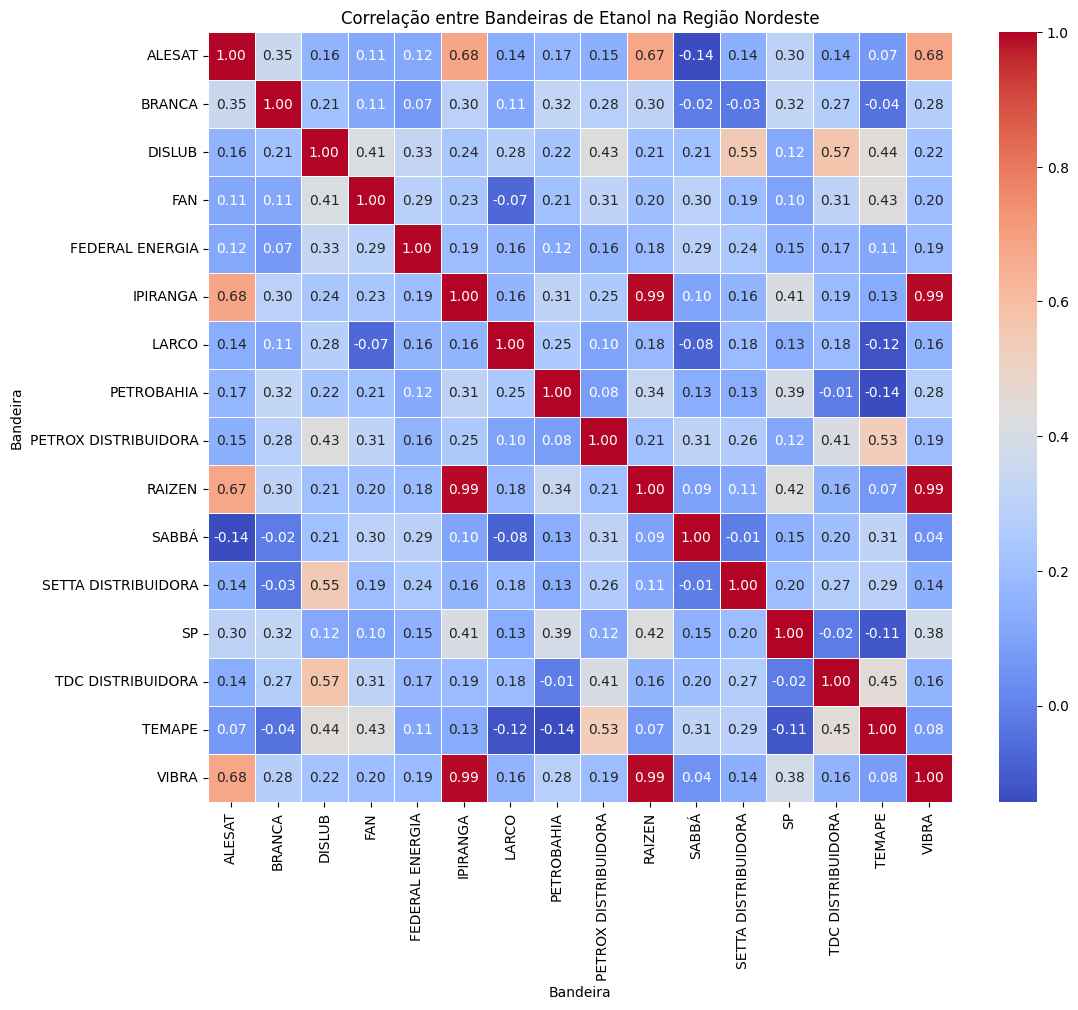

In [ ]:
# Criando um heatmap para a correlação usando a função plt
plt.figure(figsize=(12, 10))
sns.heatmap(etanol_correlacao_ne, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação entre Bandeiras de Etanol na Região Nordeste')
plt.show()

#### ***Gasolina***

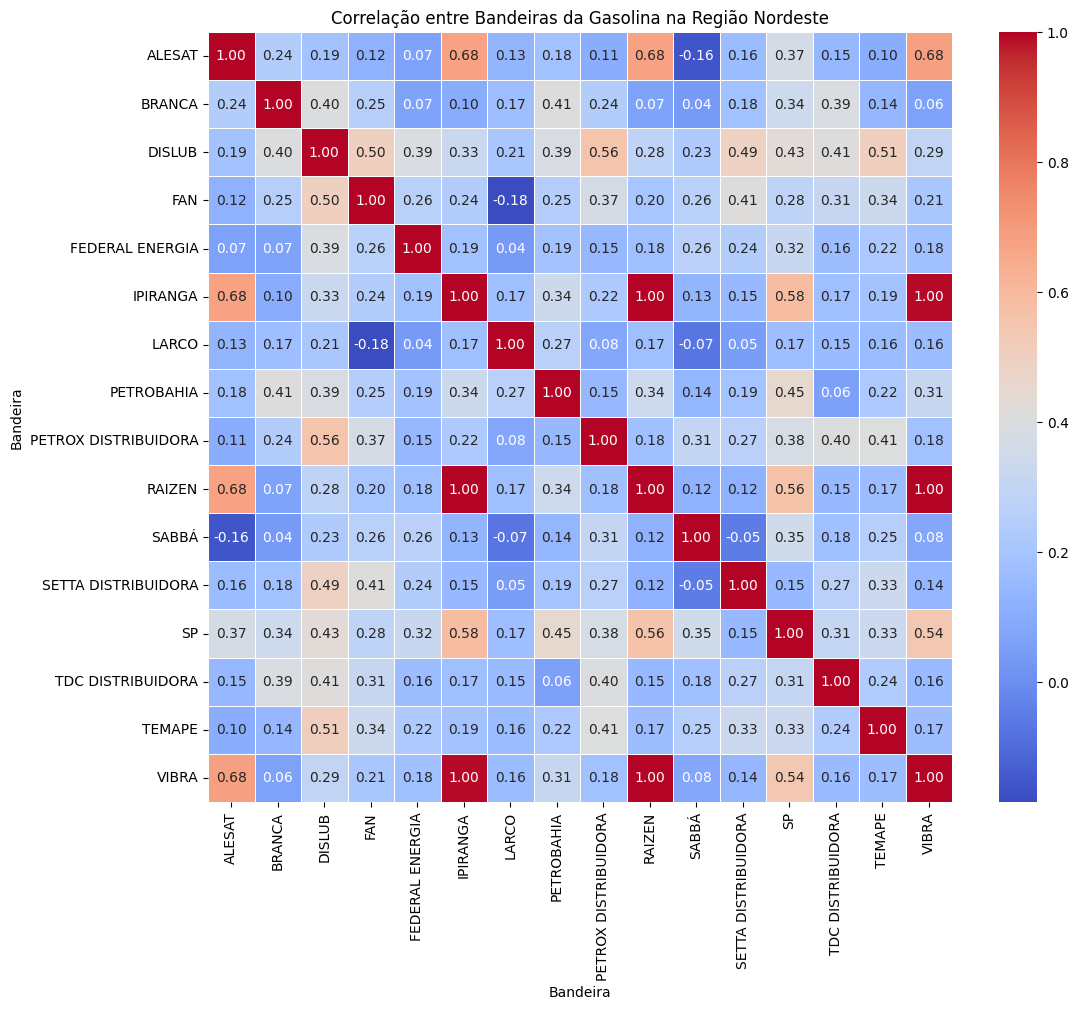

In [ ]:
# Utilizamos essa função para dropar a coluna Etanol, criar um novo dataframe e renomear o nome de
# index que estava como Produto, removendo o nome e deixando o index sem nome e reindexando.
gasolina = combustivel_bandeira.drop('ETANOL', axis=1).copy().rename_axis(None, axis=1).reset_index()
# Selecionando a Região da Gasolina
gasolina_ne = gasolina[gasolina['Regiao - Sigla'] == 'NE']
# Criando um novo DataFrame com o Index:Data da Coleta, Colunas: Bandeira, Valores: Gasolina para fazer uma correlação.
gasolina_ne_novodf = gasolina_ne.pivot(index='Data da Coleta', columns='Bandeira', values='GASOLINA')
# Fazendo a correlação do preço da Gasolina de bandeira para outra bandeira.
# Filtrando os dados faltantes com o Fillna()
gasolina_correlacao_ne = gasolina_ne_novodf.fillna(0).corr()
# Criando um heatmap para a correlação usando a função plt
plt.figure(figsize=(12, 10))
sns.heatmap(gasolina_correlacao_ne, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação entre Bandeiras da Gasolina na Região Nordeste')
plt.show()

### ***Região Norte***

#### ***Etanol***

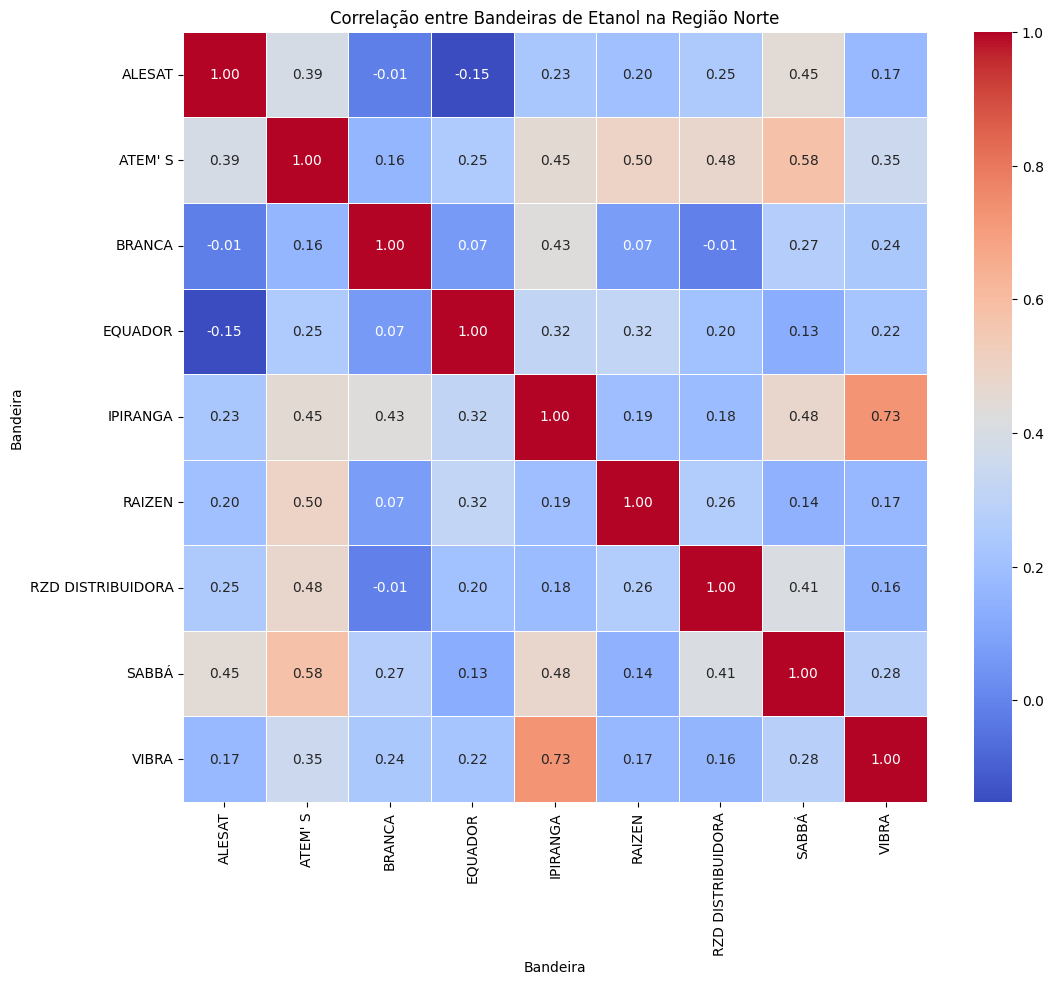

In [ ]:
# Utilizamos essa função para dropar a coluna Gasolina, criar um novo dataframe e renomear o nome de
# index que estava como Produto, removendo o nome e deixando o index sem nome e reindexando.
etanol = combustivel_bandeira.drop('GASOLINA', axis=1).copy().rename_axis(None, axis=1).reset_index()
# Selecionando a Região do Etanol
etanol_n = etanol[etanol['Regiao - Sigla'] == 'N']
# Criando um novo DataFrame com o Index:Data da Coleta, Colunas: Bandeira, Valores: Etanol para fazer uma correlação.
etanol_n_novodf = etanol_n.pivot(index='Data da Coleta', columns='Bandeira', values='ETANOL')
# Fazendo a correlação do preço do etanol de bandeira para outra bandeira.
# Filtrando os dados faltantes com o Fillna()
etanol_correlacao_n = etanol_n_novodf.fillna(0).corr()

# Criando um heatmap para a correlação usando a função plt
plt.figure(figsize=(12, 10))
sns.heatmap(etanol_correlacao_n, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação entre Bandeiras de Etanol na Região Norte')
plt.show()

#### ***Gasolina***

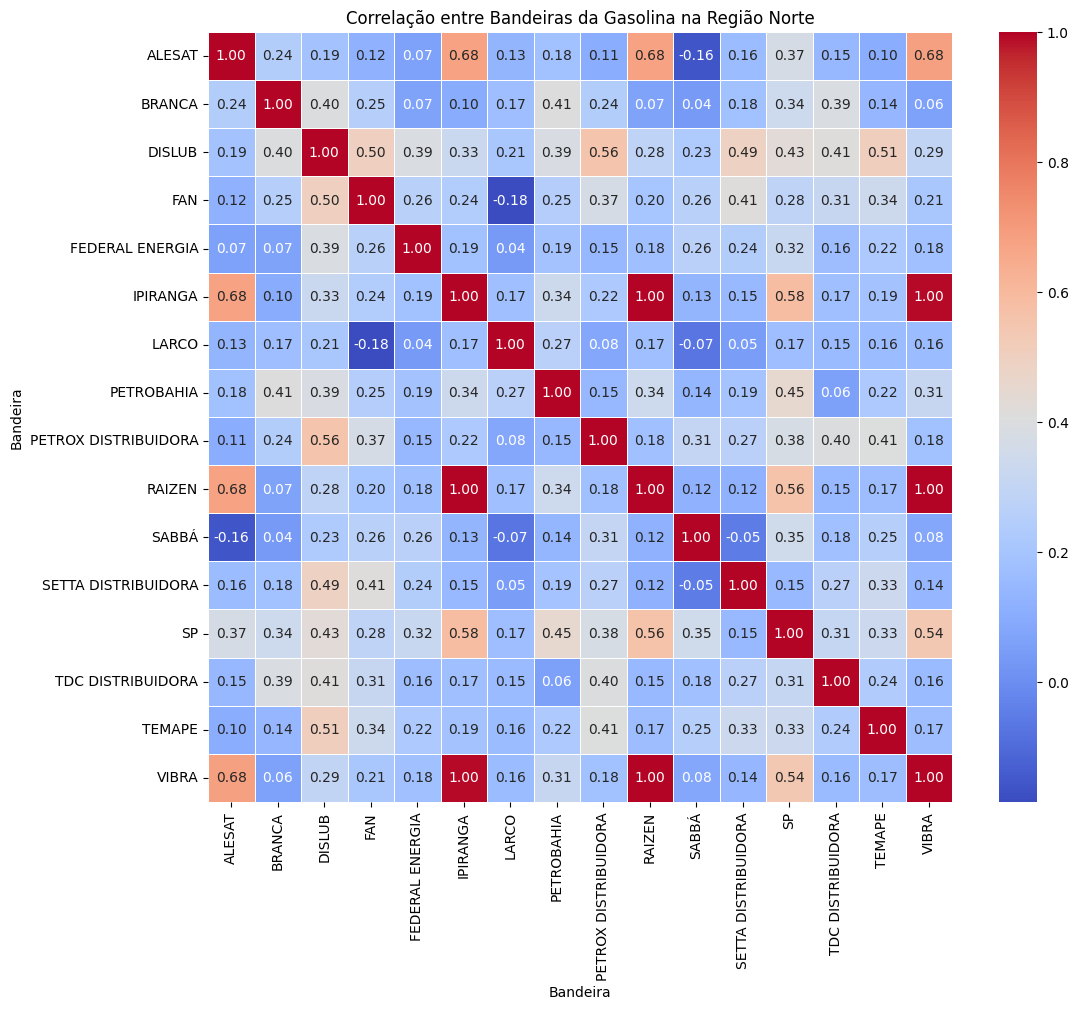

In [ ]:
# Utilizamos essa função para dropar a coluna Etanol, criar um novo dataframe e renomear o nome de
# index que estava como Produto, removendo o nome e deixando o index sem nome e reindexando.
gasolina_n = combustivel_bandeira.drop('ETANOL', axis=1).copy().rename_axis(None, axis=1).reset_index()
# Selecionando a Região da gasolina
gasolina_n = gasolina_n[gasolina['Regiao - Sigla'] == 'N']
# Criando um novo DataFrame com o Index:Data da Coleta, Colunas: Bandeira, Valores: Gasolina para fazer uma correlação.
gasolina_n_novodf = gasolina_n.pivot(index='Data da Coleta', columns='Bandeira', values='GASOLINA')
# Fazendo a correlação do preço do etanol de bandeira para outra bandeira.
# Filtrando os dados faltantes com o Fillna()
gasolina_correlacao_n = gasolina_n_novodf.fillna(0).corr()
# Criando um heatmap para a correlação usando a função plt
plt.figure(figsize=(12, 10))
sns.heatmap(gasolina_correlacao_ne, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação entre Bandeiras da Gasolina na Região Norte')
plt.show()

### ***Região Centro-Oeste***



#### ***Etanol***

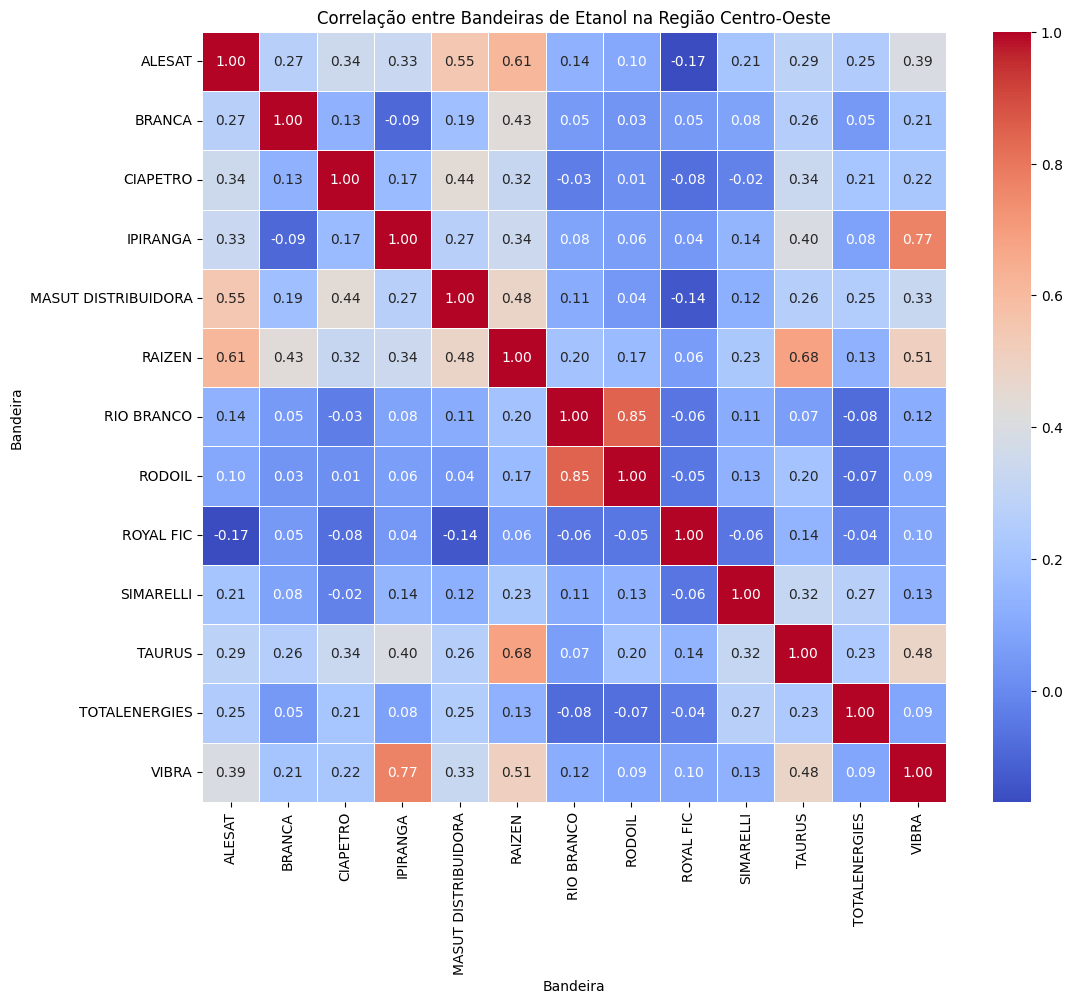

In [ ]:
# Utilizamos essa função para dropar a coluna Gasolina, criar um novo dataframe e renomear o nome de
# index que estava como Produto, removendo o nome e deixando o index sem nome e reindexando.
etanol = combustivel_bandeira.drop('GASOLINA', axis=1).copy().rename_axis(None, axis=1).reset_index()
# Selecionando a Região do Etanol
etanol_co = etanol[etanol['Regiao - Sigla'] == 'CO']
# Criando um novo DataFrame com o Index:Data da Coleta, Colunas: Bandeira, Valores: Etanol para fazer uma correlação.
etanol_co_novodf = etanol_co.pivot(index='Data da Coleta', columns='Bandeira', values='ETANOL')
# Fazendo a correlação do preço do etanol de bandeira para outra bandeira.
# Filtrando os dados faltantes com o Fillna()
etanol_correlacao_co = etanol_co_novodf.fillna(0).corr()
# Criando um heatmap para a correlação usando a função plt
plt.figure(figsize=(12, 10))
sns.heatmap(etanol_correlacao_co, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação entre Bandeiras de Etanol na Região Centro-Oeste')
plt.show()

#### ***Gasolina***

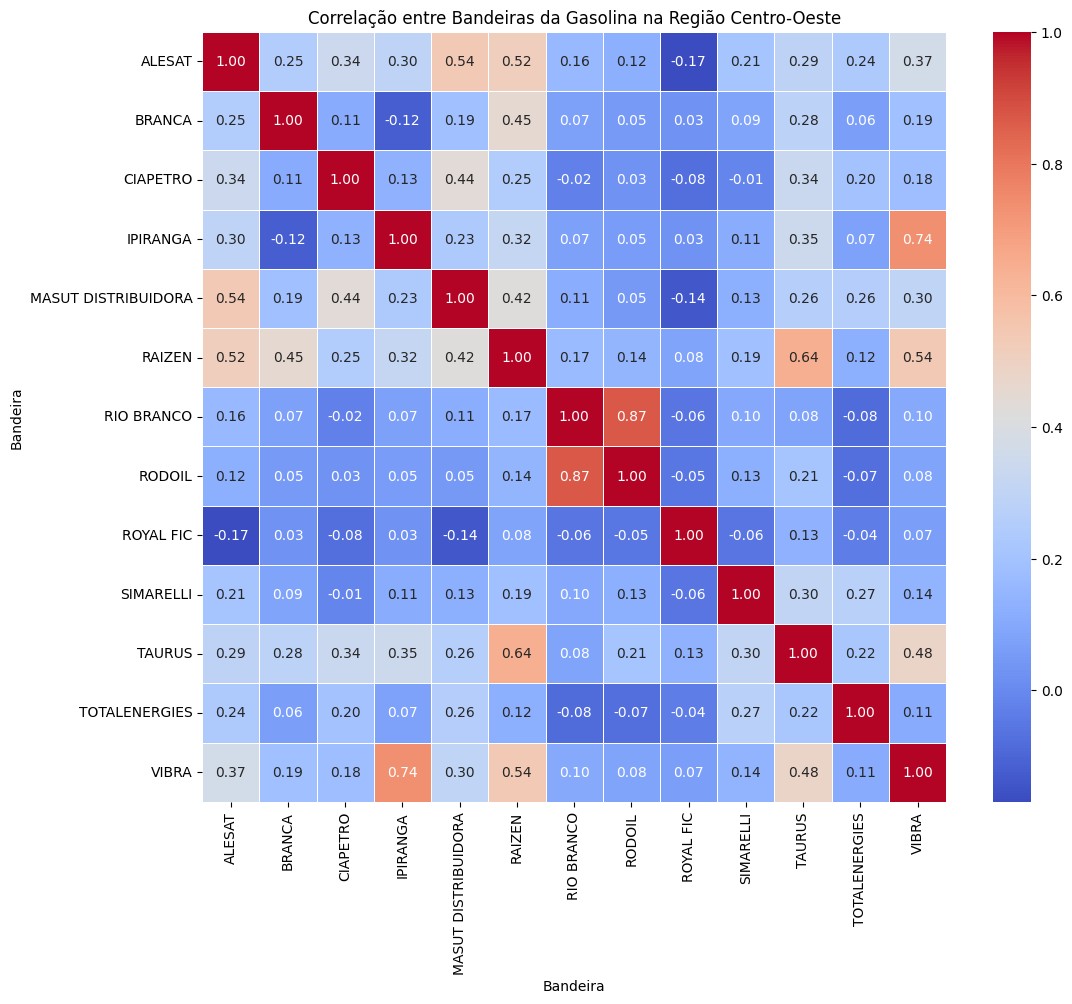

In [ ]:
# Utilizamos essa função para dropar a coluna Etanol, criar um novo dataframe e renomear o nome de
# index que estava como Produto, removendo o nome e deixando o index sem nome e reindexando.
gasolina_n = combustivel_bandeira.drop('ETANOL', axis=1).copy().rename_axis(None, axis=1).reset_index()
# Selecionando a Região da Gasolina
gasolina_co = gasolina[gasolina['Regiao - Sigla'] == 'CO']
# Criando um novo DataFrame com o Index:Data da Coleta, Colunas: Bandeira, Valores: Gasolina para fazer uma correlação.
gasolina_co_novodf = gasolina_co.pivot(index='Data da Coleta', columns='Bandeira', values='GASOLINA')
# Fazendo a correlação do preço da Gasolina de bandeira para outra bandeira.
# Filtrando os dados faltantes com o Fillna()
gasolina_correlacao_co = gasolina_co_novodf.fillna(0).corr()
# Criando um heatmap para a correlação usando a função plt
plt.figure(figsize=(12, 10))
sns.heatmap(gasolina_correlacao_co, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação entre Bandeiras da Gasolina na Região Centro-Oeste')
plt.show()

### ***Região Sudeste***

#### ***Etanol***

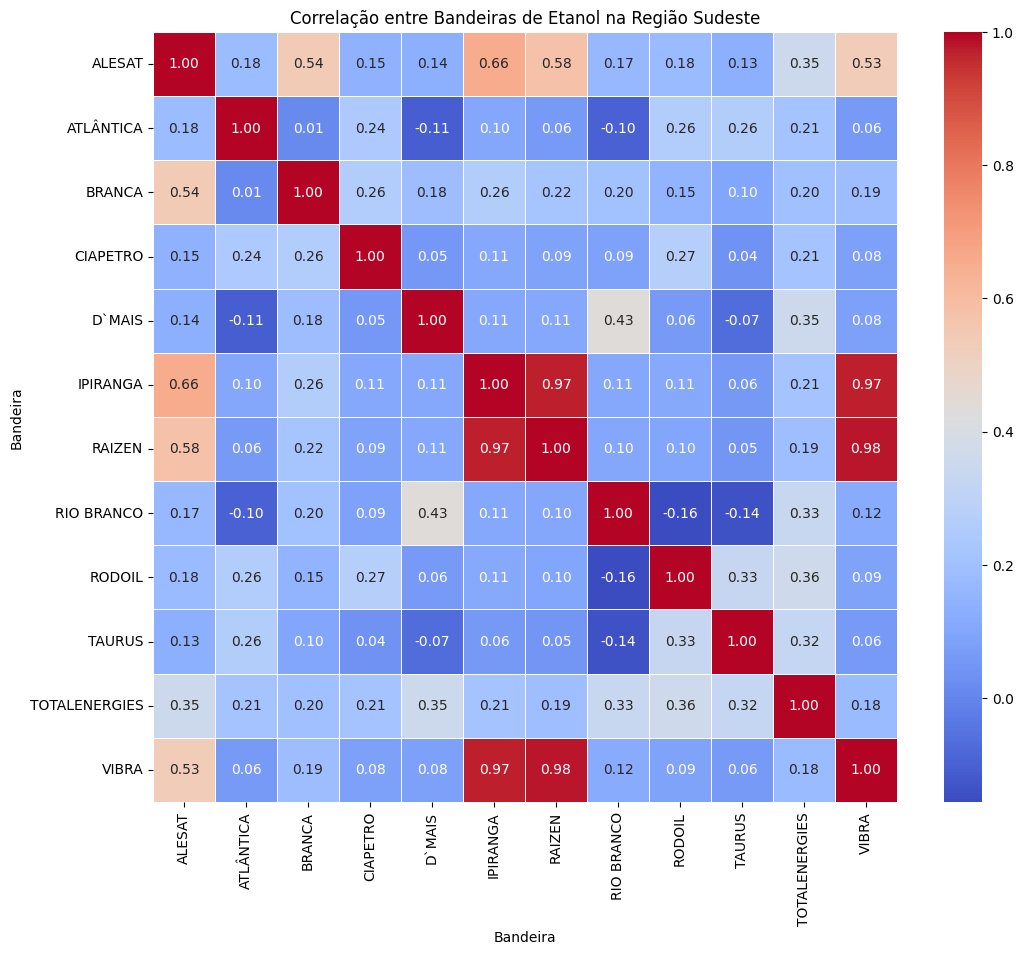

In [ ]:
# Utilizamos essa função para dropar a coluna Gasolina, criar um novo dataframe e renomear o nome de
# index que estava como Produto, removendo o nome e deixando o index sem nome e reindexando.
etanol = combustivel_bandeira.drop('GASOLINA', axis=1).copy().rename_axis(None, axis=1).reset_index()
# Selecionando a Região do Etanol
etanol_se = etanol[etanol['Regiao - Sigla'] == 'SE']
# Criando um novo DataFrame com o Index:Data da Coleta, Colunas: Bandeira, Valores: Etanol para fazer uma correlação.
etanol_se_novodf = etanol_se.pivot(index='Data da Coleta', columns='Bandeira', values='ETANOL')
# Fazendo a correlação do preço do etanol de bandeira para outra bandeira.
# Filtrando os dados faltantes com o Fillna()
etanol_correlacao_se = etanol_se_novodf.fillna(0).corr()
# Criando um heatmap para a correlação usando a função plt
plt.figure(figsize=(12, 10))
sns.heatmap(etanol_correlacao_se, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação entre Bandeiras de Etanol na Região Sudeste')
plt.show()

#### ***Gasolina***

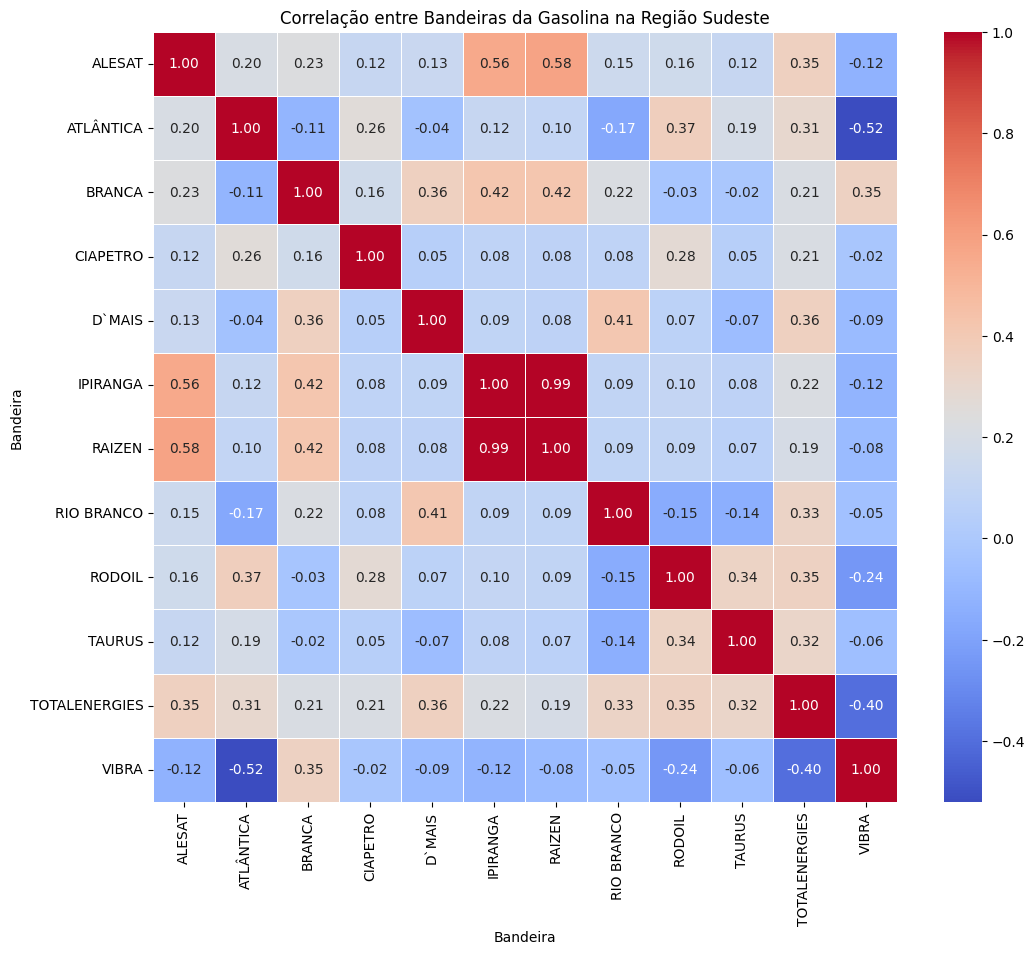

In [ ]:
# Utilizamos essa função para dropar a coluna Etanol, criar um novo dataframe e renomear o nome de
# index que estava como Produto, removendo o nome e deixando o index sem nome e reindexando.
gasolina_n = combustivel_bandeira.drop('ETANOL', axis=1).copy().rename_axis(None, axis=1).reset_index()
# Selecionando a Região da Gasolina
gasolina_se = gasolina[gasolina['Regiao - Sigla'] == 'SE']
# Criando um novo DataFrame com o Index:Data da Coleta, Colunas: Bandeira, Valores: Gasolina para fazer uma correlação.
gasolina_se_novodf = gasolina_se.pivot(index='Data da Coleta', columns='Bandeira', values='GASOLINA')
# Fazendo a correlação do preço da Gasolina de bandeira para outra bandeira.
# Filtrando os dados faltantes com o Fillna()
gasolina_correlacao_se = gasolina_se_novodf.fillna(0).corr()
# Criando um heatmap para a correlação usando a função plt
plt.figure(figsize=(12, 10))
sns.heatmap(gasolina_correlacao_se, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação entre Bandeiras da Gasolina na Região Sudeste')
plt.show()

### ***Região Sul***

#### ***Etanol***

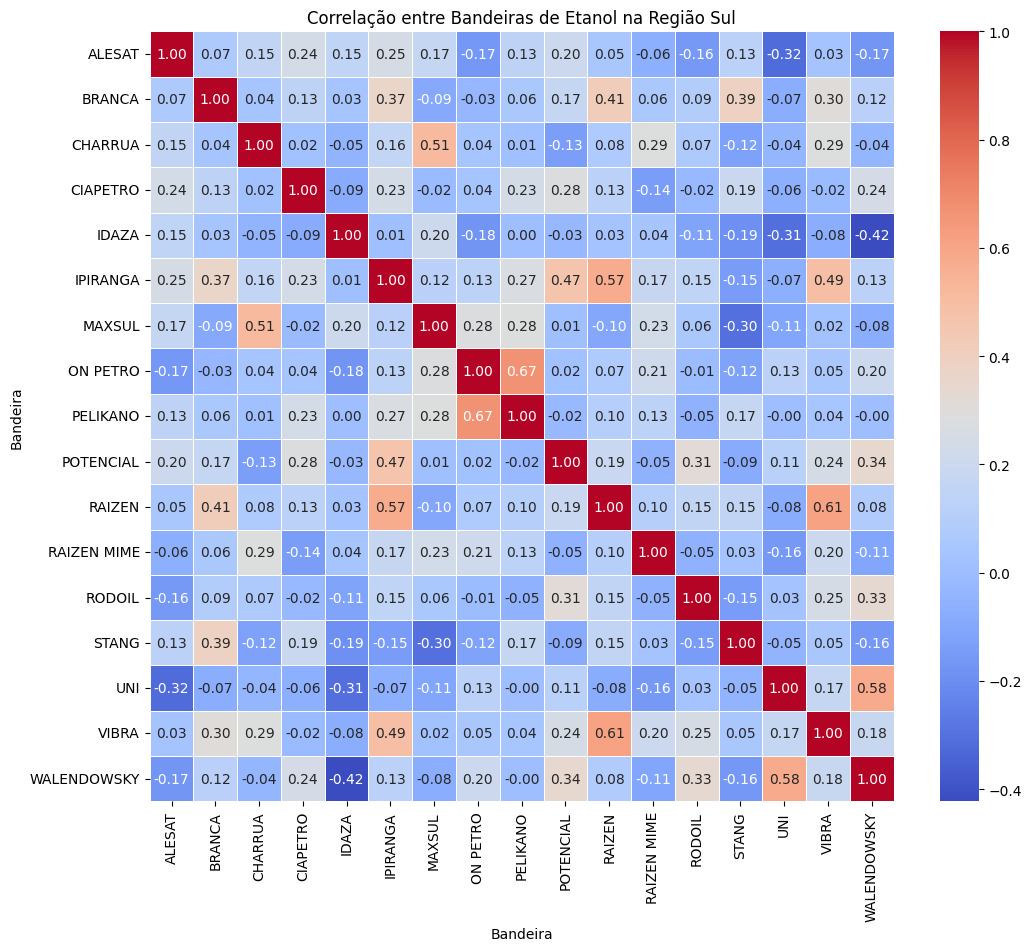

In [ ]:
# Utilizamos essa função para dropar a coluna Gasolina, criar um novo dataframe e renomear o nome de
# index que estava como Produto, removendo o nome e deixando o index sem nome e reindexando.
etanol = combustivel_bandeira.drop('GASOLINA', axis=1).copy().rename_axis(None, axis=1).reset_index()
# Selecionando a Região do Etanol
etanol_s = etanol[etanol['Regiao - Sigla'] == 'S']
# Criando um novo DataFrame com o Index:Data da Coleta, Colunas: Bandeira, Valores: Etanol para fazer uma correlação.
etanol_s_novodf = etanol_s.pivot(index='Data da Coleta', columns='Bandeira', values='ETANOL')
# Fazendo a correlação do preço do etanol de bandeira para outra bandeira.
# Removendo linhas e colunas em branco
etanol_correlacao_s = etanol_correlacao_s.replace(0, pd.NA).dropna(axis=0, how='all').dropna(axis=1, how='all')
# Criando um heatmap para a correlação usando a função plt
plt.figure(figsize=(12, 10))
sns.heatmap(etanol_correlacao_s, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação entre Bandeiras de Etanol na Região Sul')
plt.show()

#### ***Gasolina***

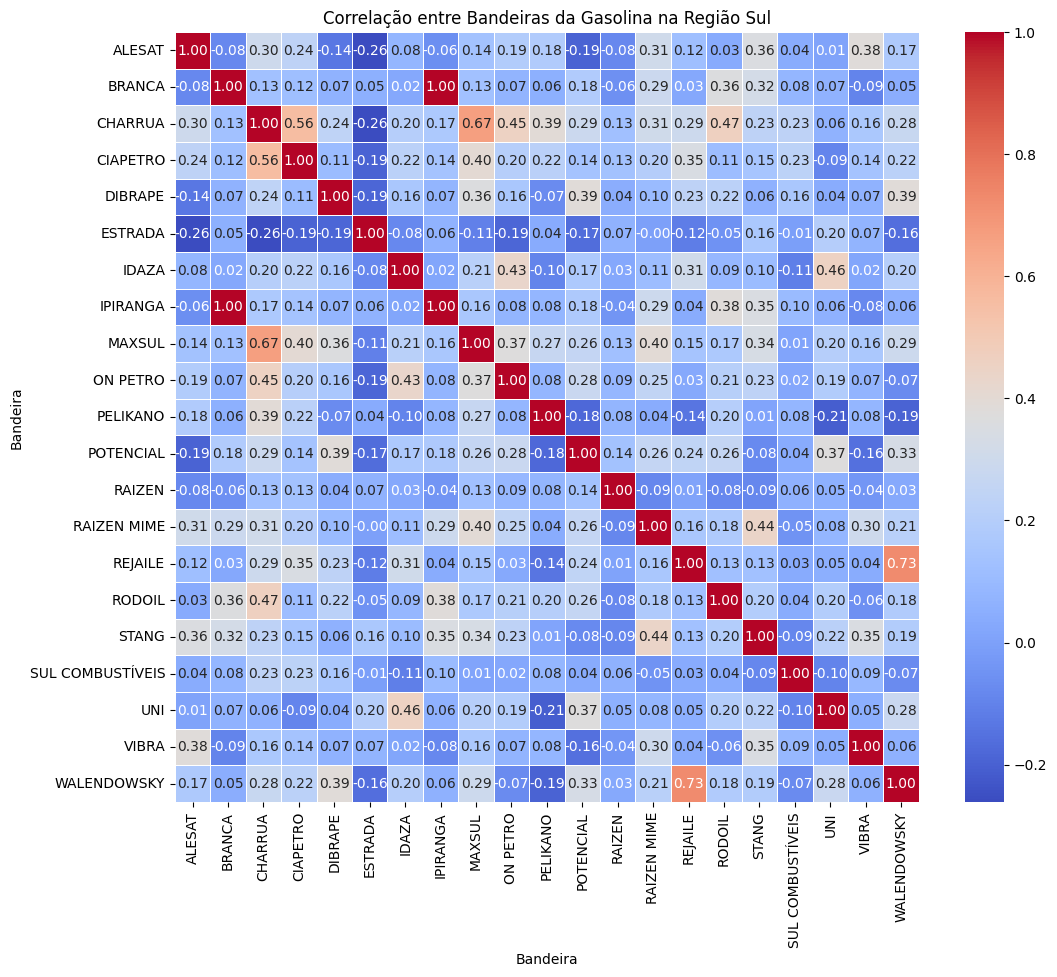

In [ ]:
# Utilizamos essa função para dropar a coluna Etanol, criar um novo dataframe e renomear o nome de
# index que estava como Produto, removendo o nome e deixando o index sem nome e reindexando.
gasolina_n = combustivel_bandeira.drop('ETANOL', axis=1).copy().rename_axis(None, axis=1).reset_index()
# Selecionando a Região da Gasolina
gasolina_s = gasolina[gasolina['Regiao - Sigla'] == 'S']
# Criando um novo DataFrame com o Index:Data da Coleta, Colunas: Bandeira, Valores: Gasolina para fazer uma correlação.
gasolina_s_novodf = gasolina_s.pivot(index='Data da Coleta', columns='Bandeira', values='GASOLINA')
# Fazendo a correlação do preço da Gasolina de bandeira para outra bandeira.
# Filtrando os dados faltantes com o Fillna()
gasolina_correlacao_s = gasolina_s_novodf.fillna(0).corr()
# Criando um heatmap para a correlação usando a função plt
plt.figure(figsize=(12, 10))
sns.heatmap(gasolina_correlacao_s, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação entre Bandeiras da Gasolina na Região Sul')
plt.show()

##***Perguntas Extra***

###*11. Qual a distribuição de bandeiras por região do país?*

In [ ]:
# Contando o número de bandeiras em cada região
distribuicao_bandeiras = dfproc.groupby(['Regiao - Sigla', 'Bandeira']).size().reset_index(name='Contagem')

# Agrupando os dados por região e bandeira e contando o número de ocorrências
distribuicao_bandeiras = distribuicao_bandeiras.groupby(['Regiao - Sigla', 'Bandeira'])['Contagem'].sum().unstack(fill_value=0)

# Imprimindo a distribuição de bandeiras por região formatando-a
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(distribuicao_bandeiras)



Bandeira,ALESAT,ATEM' S,ATLÂNTICA,BRANCA,CHARRUA,CIAPETRO,DIBRAPE,DISLUB,D`MAIS,EQUADOR,ESTRADA,FAN,FEDERAL ENERGIA,IDAZA,IPIRANGA,LARCO,MASUT DISTRIBUIDORA,MAXSUL,ON PETRO,PELIKANO,PETROBAHIA,PETROX DISTRIBUIDORA,POTENCIAL,RAIZEN,RAIZEN MIME,REJAILE,RIO BRANCO,RODOIL,ROYAL FIC,RZD DISTRIBUIDORA,SABBÁ,SETTA DISTRIBUIDORA,SIMARELLI,SP,STANG,SUL COMBUSTÍVEIS,TAURUS,TDC DISTRIBUIDORA,TEMAPE,TOTALENERGIES,UNI,VIBRA,WALENDOWSKY
Regiao - Sigla,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CO,233,0,0,2853,0,24,0,0,0,0,0,0,0,0,1801,0,59,0,0,0,0,0,0,974,0,0,10,12,3,0,0,0,15,0,0,0,223,0,0,4,0,1415,0
N,65,388,0,1502,0,0,0,0,0,180,0,0,0,0,1286,0,0,0,0,0,0,0,0,172,0,0,0,0,0,36,636,0,0,0,0,0,0,0,0,0,0,1718,0
NE,1116,0,0,8047,0,0,0,139,0,0,0,86,46,0,2497,80,0,0,0,0,139,115,0,2624,0,0,0,0,0,0,360,47,0,250,0,0,0,51,46,0,0,5121,0
S,330,0,0,4930,268,91,18,0,0,0,15,0,0,22,5197,0,0,99,27,21,0,0,135,2385,402,4,0,343,0,0,0,0,0,0,245,19,0,0,0,0,24,3096,21
SE,2025,0,125,16501,0,20,0,0,48,0,0,0,0,0,11137,0,0,0,0,0,0,0,0,9515,0,0,42,57,0,0,0,0,0,0,0,0,16,0,0,167,0,10278,0


###*12. Existe alguma relação entre a data do mês em que determinadas bandeiras são mais lucrativas?*

In [ ]:
# Extraindo o mês da data da coleta
dfproc['Mes'] = dfproc['Data da Coleta'].dt.month

# Calculando a soma do valor de venda para cada bandeira em cada mês
lucro_por_mes = dfproc.groupby(['Mes', 'Bandeira'])['Valor de Venda'].sum().reset_index()

# Encontrando o mês de maior lucro para cada bandeira
mes_maior_lucro = lucro_por_mes.loc[lucro_por_mes.groupby('Bandeira')['Valor de Venda'].idxmax()]

# Removendo o índice numérico
mes_maior_lucro.set_index('Bandeira', inplace=True)

# Formatando a saída
mes_maior_lucro_styled = mes_maior_lucro.style.format({'Valor de Venda': 'R$ {:,.2f}'}).background_gradient(cmap='Blues')

# Imprimindo o mês de maior lucro para cada bandeira
display(mes_maior_lucro_styled)




,Mes,Valor de Venda
Bandeira,,
ALESAT,11,"R$ 9,837.40"
ATEM' S,12,"R$ 1,192.12"
ATLÂNTICA,11,R$ 368.67
BRANCA,11,"R$ 86,724.00"
CHARRUA,12,R$ 736.43
CIAPETRO,12,R$ 336.80
DIBRAPE,11,R$ 69.80
DISLUB,12,R$ 373.57
D`MAIS,11,R$ 112.72


###*13. Existe alguma bandeira exclusiva de alguns estados?*

In [ ]:
# Para cada estado, percorrer lista de bandeira e arquivar e em dataframe


In [ ]:
# Agrupando os dados por estado e bandeira
bandeiras_por_estado = dfproc.groupby(['Estado - Sigla', 'Bandeira']).size().reset_index(name='Contagem')

# Encontrando as bandeiras que aparecem apenas em um estado
bandeiras_exclusivas = bandeiras_por_estado['Bandeira'].value_counts()
bandeiras_exclusivas = bandeiras_exclusivas[bandeiras_exclusivas == 1]

# Imprimindo as bandeiras exclusivas de alguns estados
print("Bandeiras exclusivas de alguns estados:")
print(bandeiras_exclusivas)






Bandeiras exclusivas de alguns estados:
UNI                     1
CHARRUA                 1
PETROX DISTRIBUIDORA    1
REJAILE                 1
SUL COMBUSTÍVEIS        1
DIBRAPE                 1
WALENDOWSKY             1
RAIZEN MIME             1
ROYAL FIC               1
PELIKANO                1
ON PETRO                1
ESTRADA                 1
TDC DISTRIBUIDORA       1
MASUT DISTRIBUIDORA     1
ATLÂNTICA               1
LARCO                   1
RZD DISTRIBUIDORA       1
D`MAIS                  1
Name: Bandeira, dtype: int64


In [ ]:
# Agrupando os dados por estado e bandeira
bandeiras_por_estado = dfproc.groupby(['Estado - Sigla', 'Bandeira']).size().reset_index(name='Contagem')

# Encontrando as bandeiras que aparecem apenas em um estado
bandeiras_exclusivas = bandeiras_por_estado['Bandeira'].value_counts()
bandeiras_exclusivas = bandeiras_exclusivas[bandeiras_exclusivas == 1]

# Obtendo os estados correspondentes às bandeiras exclusivas
estados_bandeiras_exclusivas = bandeiras_por_estado[bandeiras_por_estado['Bandeira'].isin(bandeiras_exclusivas.index)]

# Removendo a coluna 'Contagem'
estados_bandeiras_exclusivas = estados_bandeiras_exclusivas.drop(columns='Contagem')

# Formatando a saída
estados_bandeiras_exclusivas_styled = estados_bandeiras_exclusivas.style.hide_index().set_properties(**{'background-color': 'lightblue', 'color': 'black'})

# Imprimindo as bandeiras exclusivas de alguns estados
display(estados_bandeiras_exclusivas_styled)



<ipython-input-57-3f334977146a>:15: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  estados_bandeiras_exclusivas_styled = estados_bandeiras_exclusivas.style.hide_index().set_properties(**{'background-color': 'lightblue', 'color': 'black'})


Estado - Sigla,Bandeira
AM,RZD DISTRIBUIDORA
BA,LARCO
ES,ATLÂNTICA
GO,MASUT DISTRIBUIDORA
MS,ROYAL FIC
PE,TDC DISTRIBUIDORA
PR,ESTRADA
PR,ON PETRO
PR,PELIKANO
PR,UNI
